In [1]:
import pandas as pd
df = pd.read_csv('traffic.csv')
df

,Datetime,Traffic
0,31-12-2004 01:00,135
1,31-12-2004 02:00,129
2,31-12-2004 03:00,126
3,31-12-2004 04:00,125
4,31-12-2004 05:00,127
...,...,...
121268,01-01-2018 20:00,211
121269,01-01-2018 21:00,210
121270,01-01-2018 22:00,208
121271,01-01-2018 23:00,204


In [2]:
df['Datetime']

0         31-12-2004 01:00
1         31-12-2004 02:00
2         31-12-2004 03:00
3         31-12-2004 04:00
4         31-12-2004 05:00
                ...       
121268    01-01-2018 20:00
121269    01-01-2018 21:00
121270    01-01-2018 22:00
121271    01-01-2018 23:00
121272    02-01-2018 00:00
Name: Datetime, Length: 121273, dtype: object

In [3]:
df1 = df.reset_index()['Traffic']
df1.shape

(121273,)

In [4]:
df1

0         135
1         129
2         126
3         125
4         127
         ... 
121268    211
121269    210
121270    208
121271    204
121272    200
Name: Traffic, Length: 121273, dtype: int64

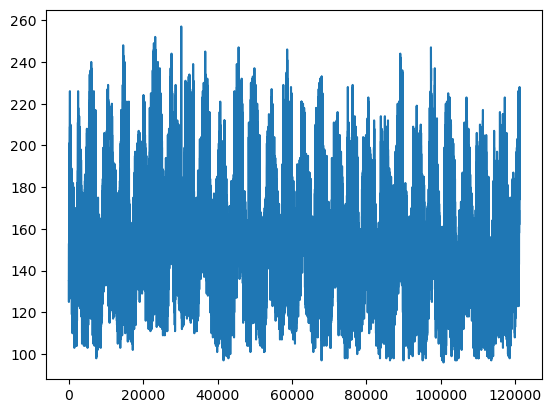

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np
df1

0         135
1         129
2         126
3         125
4         127
         ... 
121268    211
121269    210
121270    208
121271    204
121272    200
Name: Traffic, Length: 121273, dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1

array([[0.24223602],
       [0.20496894],
       [0.1863354 ],
       ...,
       [0.69565217],
       [0.67080745],
       [0.64596273]])

In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
training_size,test_size

(78827, 42446)

In [11]:
train_data,test_data

(array([[0.24223602],
        [0.20496894],
        [0.1863354 ],
        ...,
        [0.33540373],
        [0.38509317],
        [0.47204969]]),
 array([[0.51552795],
        [0.50931677],
        [0.49068323],
        ...,
        [0.69565217],
        [0.67080745],
        [0.64596273]]))

In [12]:
import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [13]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [14]:
X_train.shape , y_train.shape

((78726, 100), (78726,))

In [15]:
X_test.shape, y_test.shape

((42345, 100), (42345,))

In [16]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=120,batch_size=64,verbose=1)

Epoch 1/120
1231/1231 [==============================] - 189s 150ms/step - loss: 0.0060 - val_loss: 0.0027
Epoch 2/120
1231/1231 [==============================] - 188s 153ms/step - loss: 8.0768e-04 - val_loss: 6.5361e-04
Epoch 3/120
1231/1231 [==============================] - 191s 155ms/step - loss: 6.6708e-04 - val_loss: 5.9368e-04
Epoch 4/120
1231/1231 [==============================] - 194s 158ms/step - loss: 5.7299e-04 - val_loss: 5.9046e-04
Epoch 5/120
1231/1231 [==============================] - 191s 155ms/step - loss: 5.3177e-04 - val_loss: 6.5808e-04
Epoch 6/120
1231/1231 [==============================] - 183s 149ms/step - loss: 5.1416e-04 - val_loss: 5.7077e-04
Epoch 7/120
1231/1231 [==============================] - 177s 144ms/step - loss: 4.7898e-04 - val_loss: 5.7467e-04
Epoch 8/120
1231/1231 [==============================] - 192s 156ms/step - loss: 4.5353e-04 - val_loss: 4.5462e-04
Epoch 9/120
1231/1231 [==============================] - 201s 164ms/step - loss: 4.2578e

Epoch 72/120
1231/1231 [==============================] - 173s 141ms/step - loss: 1.9421e-04 - val_loss: 2.4942e-04
Epoch 73/120
1231/1231 [==============================] - 173s 141ms/step - loss: 1.8918e-04 - val_loss: 2.2106e-04
Epoch 74/120
1231/1231 [==============================] - 174s 141ms/step - loss: 2.0852e-04 - val_loss: 2.6816e-04
Epoch 75/120
1231/1231 [==============================] - 172s 140ms/step - loss: 1.8670e-04 - val_loss: 2.4505e-04
Epoch 76/120
1231/1231 [==============================] - 173s 140ms/step - loss: 1.8863e-04 - val_loss: 2.3345e-04
Epoch 77/120
1231/1231 [==============================] - 172s 140ms/step - loss: 1.8697e-04 - val_loss: 2.2751e-04
Epoch 78/120
1231/1231 [==============================] - 175s 142ms/step - loss: 1.8704e-04 - val_loss: 2.3599e-04
Epoch 79/120
1231/1231 [==============================] - 172s 140ms/step - loss: 1.8627e-04 - val_loss: 2.4258e-04
Epoch 80/120
1231/1231 [==============================] - 173s 141ms/ste

In [21]:
import tensorflow as tf

In [22]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1324/1324 [==============================] - 36s 27ms/step


In [23]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

159.66690283156996

In [25]:
math.sqrt(mean_squared_error(y_test,test_predict))

151.89353349350742

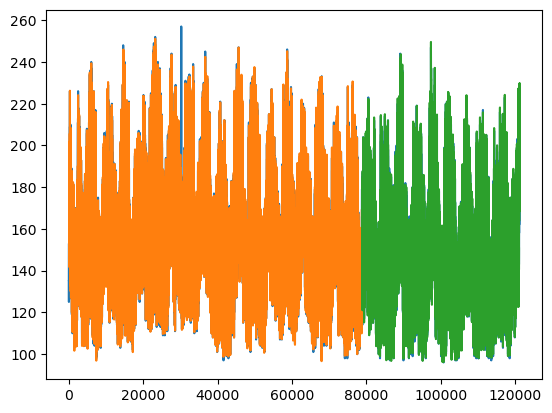

In [26]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [27]:
len(test_data)

42446

In [28]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 42105)

In [29]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [30]:
temp_input

[0.5652173913043477,
 0.5527950310559004,
 0.5341614906832297,
 0.515527950310559,
 0.5217391304347825,
 0.5217391304347825,
 0.5279503105590062,
 0.5590062111801242,
 0.5962732919254659,
 0.5714285714285714,
 0.5279503105590062,
 0.4782608695652173,
 0.35403726708074523,
 0.3478260869565216,
 0.341614906832298,
 0.3478260869565216,
 0.3726708074534161,
 0.4285714285714284,
 0.5217391304347825,
 0.5714285714285714,
 0.5403726708074532,
 0.515527950310559,
 0.496894409937888,
 0.46583850931677007,
 0.44720496894409933,
 0.4285714285714284,
 0.40993788819875765,
 0.40372670807453404,
 0.40372670807453404,
 0.40993788819875765,
 0.4347826086956521,
 0.4720496894409938,
 0.5217391304347825,
 0.5093167701863353,
 0.46583850931677007,
 0.4161490683229814,
 0.31677018633540366,
 0.30434782608695643,
 0.2981366459627328,
 0.2919254658385092,
 0.3229813664596273,
 0.3726708074534161,
 0.4720496894409938,
 0.5341614906832297,
 0.5217391304347825,
 0.5093167701863353,
 0.496894409937888,
 0.48447

In [31]:
from numpy import array

lst_output=[]
n_steps=42104
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.55279503 0.53416149 0.51552795 ... 0.69565217 0.67080745 0.64596273]
0 day output [[0.5490651]]
1 day input [0.53416149 0.51552795 0.52173913 ... 0.67080745 0.64596273 0.54906511]
1 day output [[0.5389986]]
2 day input [0.51552795 0.52173913 0.52173913 ... 0.64596273 0.54906511 0.5389986 ]
2 day output [[0.52634186]]
3 day input [0.52173913 0.52173913 0.52795031 ... 0.54906511 0.5389986  0.52634186]
3 day output [[0.52506286]]
4 day input [0.52173913 0.52795031 0.55900621 ... 0.5389986  0.52634186 0.52506286]
4 day output [[0.5377779]]
5 day input [0.52795031 0.55900621 0.59627329 ... 0.52634186 0.52506286 0.5377779 ]
5 day output [[0.56900406]]
6 day input [0.55900621 0.59627329 0.57142857 ... 0.52506286 0.5377779  0.56900406]
6 day output [[0.623003]]
7 day input [0.59627329 0.57142857 0.52795031 ... 0.5377779  0.56900406 0.62300301]
7 day output [[0.6609354]]
8 day input [0.57142857 0.52795031 0.47826087 ... 0.56900406 0.62300301 0.6609354 ]
8 day output [[0.67449075]

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
import matplotlib.pyplot as plt

In [34]:
len(df1)

121273

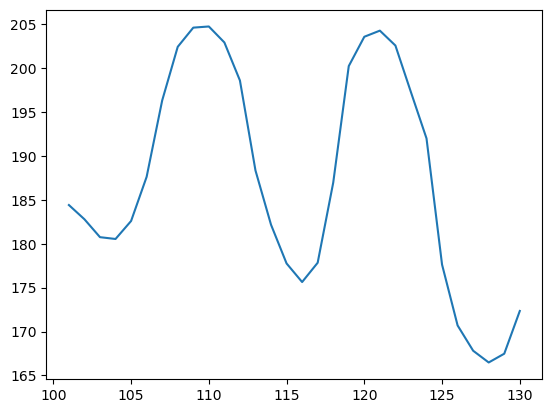

In [35]:
plt.plot(day_pred,scaler.inverse_transform(lst_output))

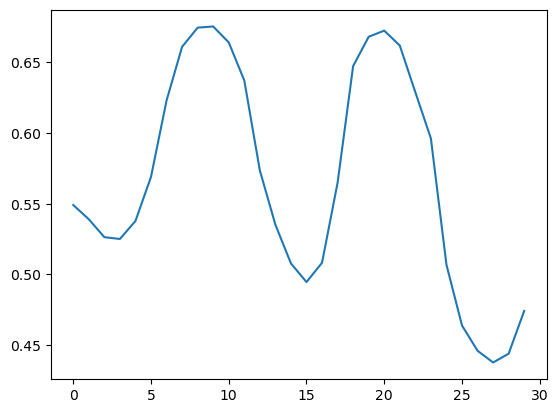

In [36]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[121273:])

In [37]:
df3=scaler.inverse_transform(df3).tolist()

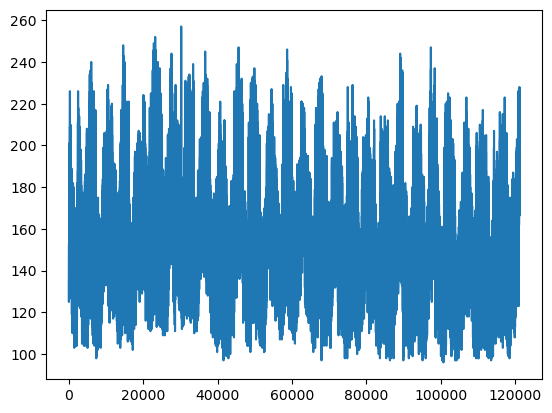

In [38]:
plt.plot(df3)